In [5]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [6]:
df = pd.read_csv('C://Users//Vasanth Kumar C//Downloads//archive (1)//emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.shape

(5728, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [18]:
df = df.rename(columns={'spam': 'label', 'text': 'messages'})

# Replace 1 with 'spam' and 0 with 'ham'
df['label'] = df['label'].replace({1: 'spam', 0: 'ham'})


df.head()


,messages,label
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


In [21]:
df['messages'] = df['messages'].str.replace('^Subject:', '', regex=True)
df.head()

,messages,label
0,naturally irresistible your corporate identit...,spam
1,the stock trading gunslinger fanny is merril...,spam
2,unbelievable new homes made easy im wanting ...,spam
3,4 color printing special request additional ...,spam
4,"do not have money , get software cds from her...",spam


In [22]:
df.describe()

,messages,label
count,5728,5728
unique,5695,2
top,"re : contact info glenn , please , contact ...",ham
freq,2,4360


In [24]:
df["length"] = df["messages"].apply(len)
df.sort_values(by='length', ascending=False).head(5)

,messages,label,length
2650,from the enron india newsdesk - april 27 th n...,ham,43944
1380,from the enron india newsdesk - april 27 th n...,ham,43929
2338,from the enron india newsdesk - april 23 rd n...,ham,31047
536,make thousands just sending emails . it ' s e...,spam,28424
2560,from the enron india newsdesk - may 5 - 7 new...,ham,27957


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

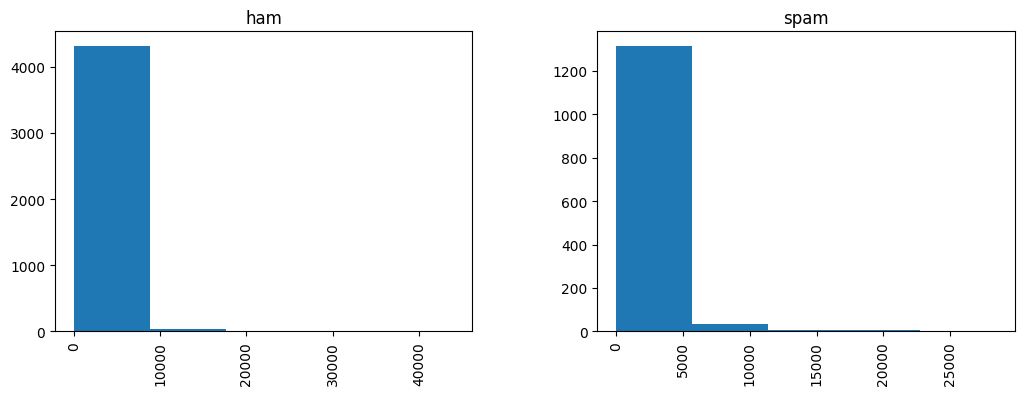

In [25]:
df.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [26]:
def transform_message(messages):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in messages:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [27]:
df['messages'].head(5).apply(transform_message)

0    [, naturally, irresistible, corporate, identit...
1    [, stock, trading, gunslinger, , fanny, merril...
2    [, unbelievable, new, homes, made, easy, , im,...
3    [, 4, color, printing, special, , request, add...
4    [, money, , get, software, cds, , , software, ...
Name: messages, dtype: object

In [30]:
# Vectorization
vectorization = CountVectorizer(analyzer = transform_message )
X = vectorization.fit(df['messages'])

In [ ]:
X_transform = X.transform([df['messages']])

In [ ]:
# TF-IDF
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)

In [ ]:
# Classification Model

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['messages'], test_size=0.30, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
# Test model

predictions = clf.predict(X_test)
print('predicted', predictions)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))